# Hypotheses 1 and 3

Use [a)](https://daviddalpiaz.github.io/appliedstats/model-diagnostics.html#influence), [b)](https://daviddalpiaz.github.io/appliedstats/transformations.html), and [c)](https://ademos.people.uic.edu/Chapter18.html) as a reference.


The presence of credibility indicators in the system will:

- $H_1$: decrease the affirmation rate for rumours with lower evidence levels.
- $H_3$: increase the affirmation rate for rumours with higher evidence levels.

In [1]:
library(lme4)
library(e1071) 
library(parameters) 

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
data$condition = as.factor(data$condition)
data$evidence = as.factor(data$evidence)
data$educationLevel = as.factor(data$educationLevel)
data$politicalAffiliation = as.factor(data$politicalAffiliation)
data$attendsProtests = as.factor(data$attendsProtests)
head(data)

Loading required package: Matrix


Attaching package: ‘parameters’


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness




,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,High,0.1,0.0,0.00,0.25,1.0000000
2,-1.091052e+18,1,2021-06-03 14:35:53.721000+00:00,undergrad,centre,False,22,0,0,1,⋯,1,1,1,Treatment,Low,0.1,0.1,0.50,0.50,0.5000000
3,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,High,0.2,0.2,0.25,0.50,0.5000000
4,-1.363632e+18,1,2021-06-03 14:35:28.980000+00:00,highSchool,left,False,31,1,0,0,⋯,1,1,0,Treatment,Low,0.3,0.6,0.25,0.00,0.3333333
5,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,High,0.5,0.0,0.25,0.00,1.0000000
6,-1.782715e+18,1,2021-06-03 14:34:50.118000+00:00,graduateSchool,centreRight,False,36,1,0,0,⋯,0,0,1,Control,Low,0.5,0.4,0.25,0.25,0.5555556


In [2]:
md.affirms = lmer(Affirms ~ evidence * condition + (1 |user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: -126

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7658 -0.5485 -0.1249  0.3175  2.2637 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01509  0.1228  
 Residual             0.01334  0.1155  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                     0.1714133  0.0247775   6.918
evidenceLow                    -0.0365357  0.0242513  -1.507
conditionTreatment             -0.0007122  0.0376823  -0.019
evidenceLow:conditionTreatment -0.0309557  0.0371741  -0.833

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.520              
cndtnTrtmnt -0.658  0.342       
evdncLw:cnT  0.339 -0.652 -0.524

In [3]:
p_value_satterthwaite(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),1.586717e-10
evidenceLow,1.358718e-01
conditionTreatment,9.849475e-01
evidenceLow:conditionTreatment,4.074458e-01


Often, the assumptions of linear regression, are stated as,

- **Linearity**: the response can be written as a linear combination of the predictors. (With noise about this true linear relationship.)
- **Independence**: the errors are independent.
- **Normality**: the distribution of the errors should follow a normal distribution.
- **Equal Variance**: the error variance is the same at any set of predictor values.

The linearity assumption is encoded as

$\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...+\beta_{p−1}x_{i(p−1)}$,

while the remaining three, are all encoded in

$\epsilon_i~N(0,\sigma^2)$,

since the $\epsilon_i$ are iid normal random variables with constant variance.

If these assumptions are met, great! We can perform inference, and it is valid. If these assumptions are not met, we can still “perform” a t
-test using R, but the results are not valid. The distributions of the parameter estimates will not be what we expect. Hypothesis tests will then accept or reject incorrectly. Essentially, garbage in, garbage out.


## linearity and constant variance 

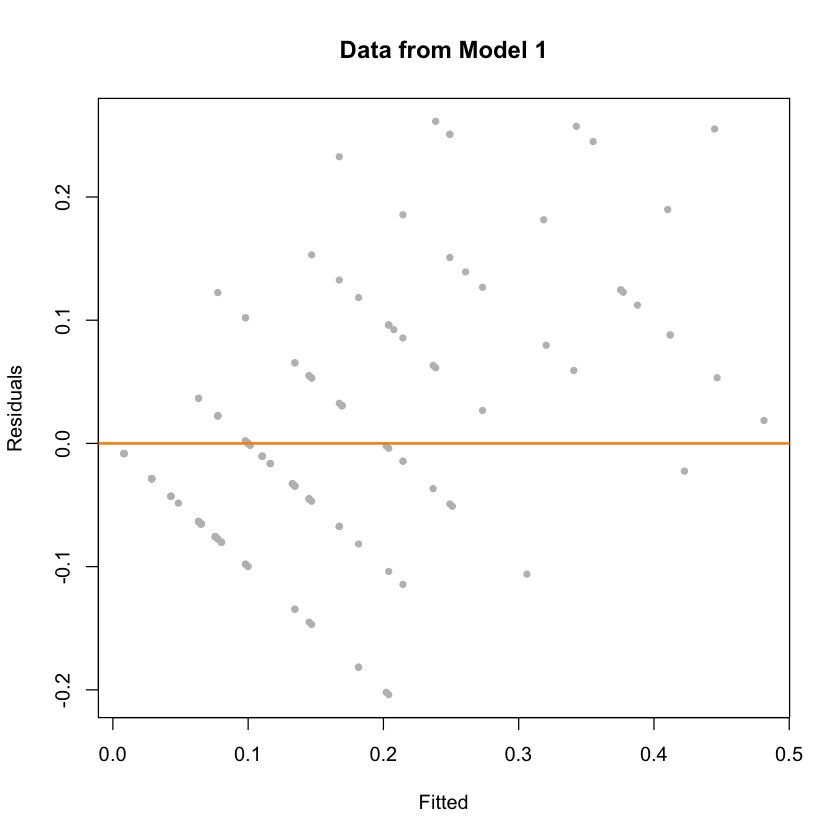

In [4]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

## Normality

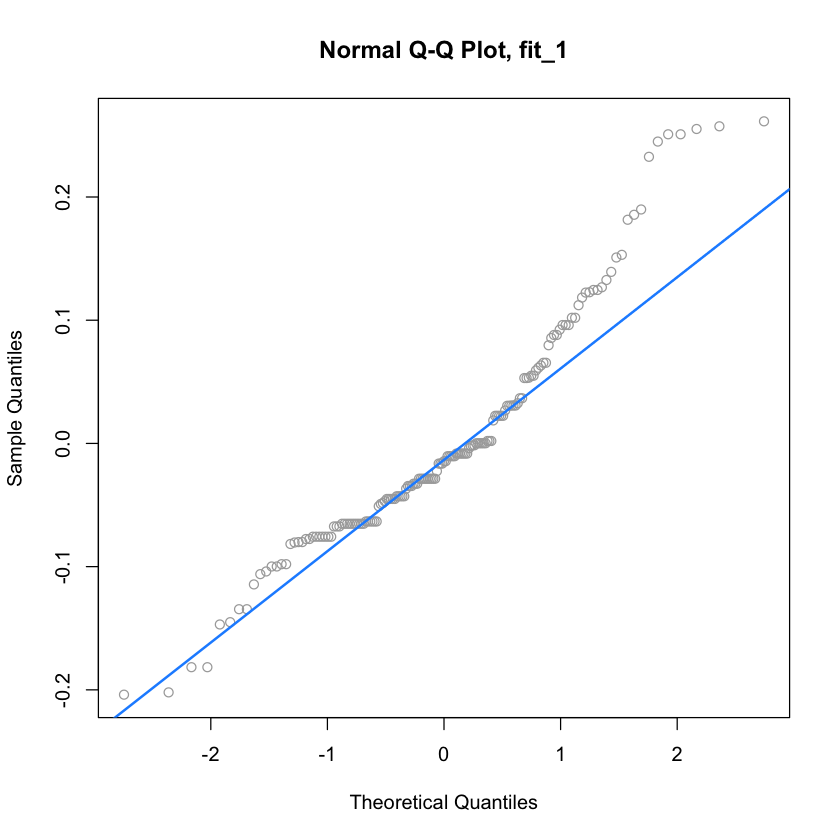

In [5]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [6]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.93818, p-value = 1.42e-06


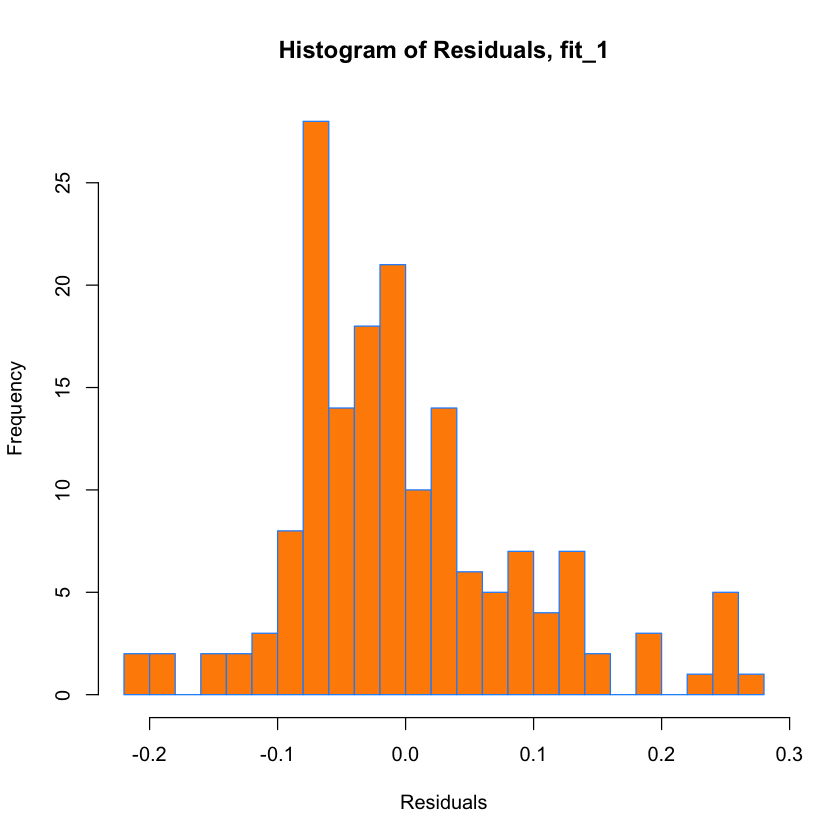

In [7]:
hist(resid(md.affirms),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

#### Normality assumption is broekn so transform response var

In [8]:
skewness(data$Affirms)
data$ATrans <- (sqrt(data$Affirms))
skewness(data$ATrans)

Skewness,SE
<dbl>,<dbl>
1.224616,0.1872668


Skewness,SE
<dbl>,<dbl>
0.2300655,0.1872668


In [9]:
md.affirms = lmer(ATrans ~ evidence * condition + (1 |user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: ATrans ~ evidence * condition + (1 | user_id)
   Data: data

REML criterion at convergence: 11.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.82944 -0.70613 -0.01121  0.52571  1.90735 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03112  0.1764  
 Residual             0.03350  0.1830  
Number of obs: 165, groups:  user_id, 89

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.32158    0.03745   8.586
evidenceLow                    -0.05146    0.03838  -1.341
conditionTreatment              0.01197    0.05698   0.210
evidenceLow:conditionTreatment -0.06597    0.05879  -1.122

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.544              
cndtnTrtmnt -0.657  0.357       
evdncLw:cnT  0.355 -0.653 -0.547

In [10]:
p_value_satterthwaite(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),1.507289e-14
evidenceLow,1.837757e-01
conditionTreatment,8.339271e-01
evidenceLow:conditionTreatment,2.651547e-01


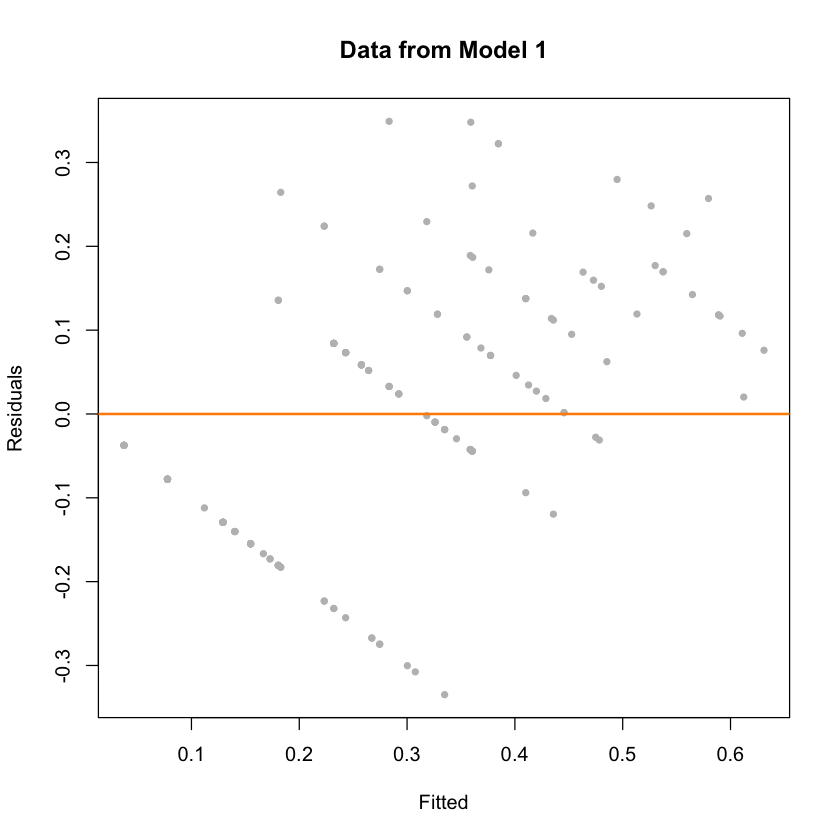

In [11]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

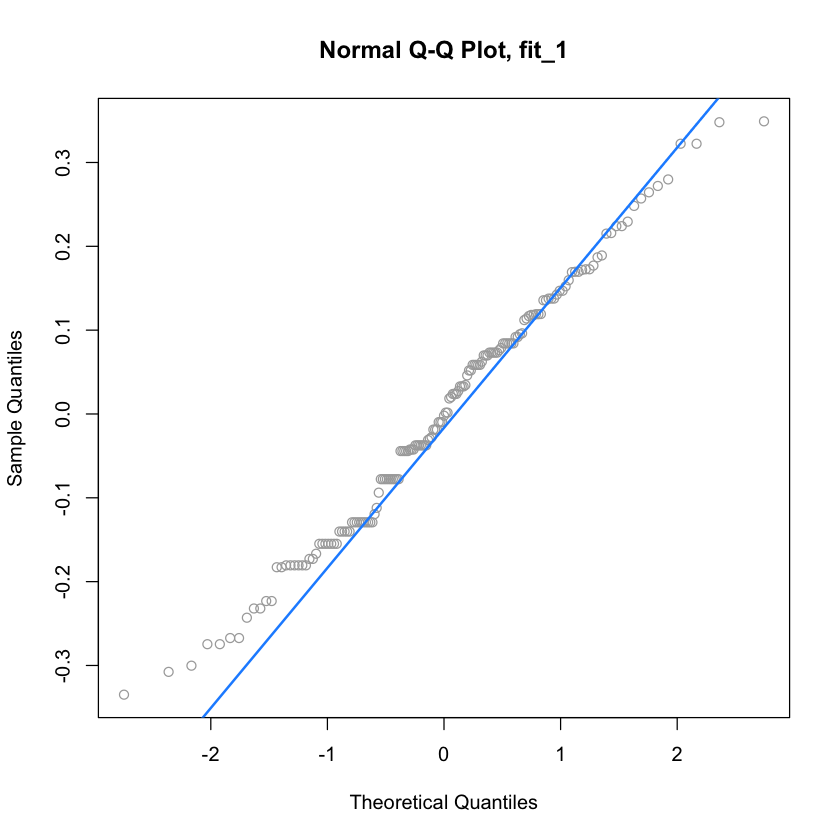

In [12]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [13]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.98841, p-value = 0.1925


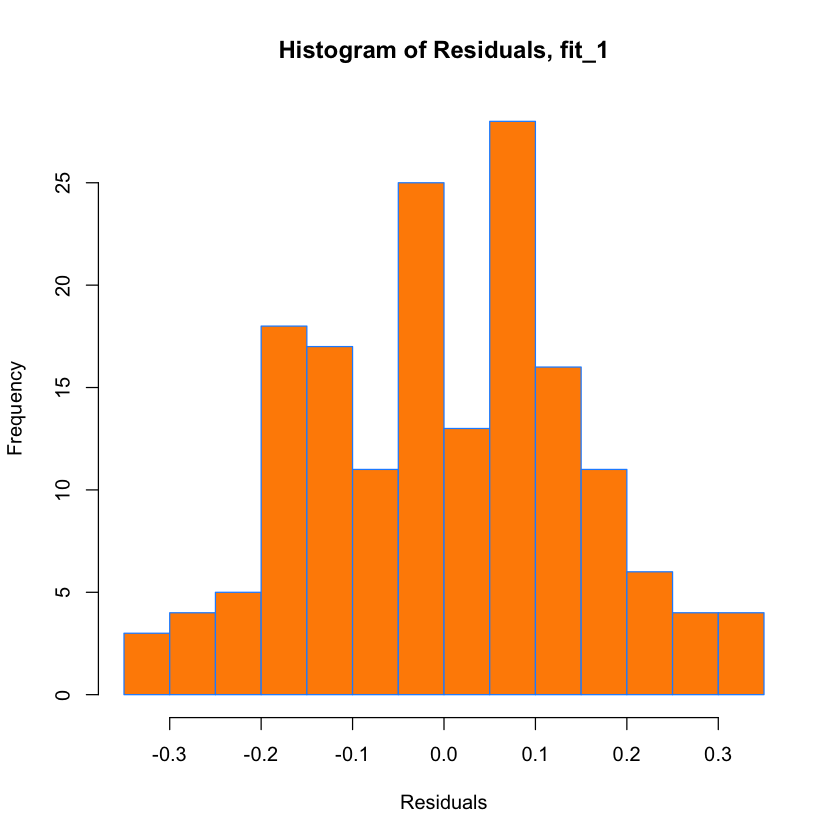

In [14]:
hist(resid(md.affirms),
     xlab   = "Residuals",
     main   = "Histogram of Residuals, fit_1",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

### SEE HOW ESTIMATES CHANGE WHEN REMOVE INFLUENTIAL POINTS

In [15]:
cd_md.affirms = cooks.distance(md.affirms)
sum(cd_md.affirms > 80 / length(cd_md.affirms))

[1] 8

In [16]:
large_cd_mpg = cd_md.affirms > 80 / length(cd_md.affirms)
cd_md.affirms[large_cd_mpg]

20        22        55        56        58       117       118       148 
0.6244926 0.6766437 0.6536424 0.7065205 0.5416862 0.7061307 0.5486888 0.6244926

In [17]:
md.affirms = lmer(ATrans ~ evidence * condition + (1 |user_id), 
                  data = data,
                  subset = cd_md.affirms <= 80 / length(cd_md.affirms)
                 )
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: ATrans ~ evidence * condition + (1 | user_id)
   Data: data
 Subset: cd_md.affirms <= 80/length(cd_md.affirms)

REML criterion at convergence: -15.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.79680 -0.62447 -0.01134  0.54312  1.84357 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.03877  0.1969  
 Residual             0.02205  0.1485  
Number of obs: 157, groups:  user_id, 86

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.322102   0.036808   8.751
evidenceLow                    -0.055018   0.032014  -1.719
conditionTreatment             -0.008935   0.056314  -0.159
evidenceLow:conditionTreatment -0.055764   0.049695  -1.122

Correlation of Fixed Effects:
            (Intr) evdncL cndtnT
evidenceLow -0.465              
cndtnTrtmnt -0.654  0.304       
evdncLw:cnT  0.300 -0.644 -0.483

In [18]:
p_value_satterthwaite(md.affirms)

Parameter,p
<chr>,<dbl>
(Intercept),1.413715e-14
evidenceLow,8.991288e-02
conditionTreatment,8.741906e-01
evidenceLow:conditionTreatment,2.653823e-01


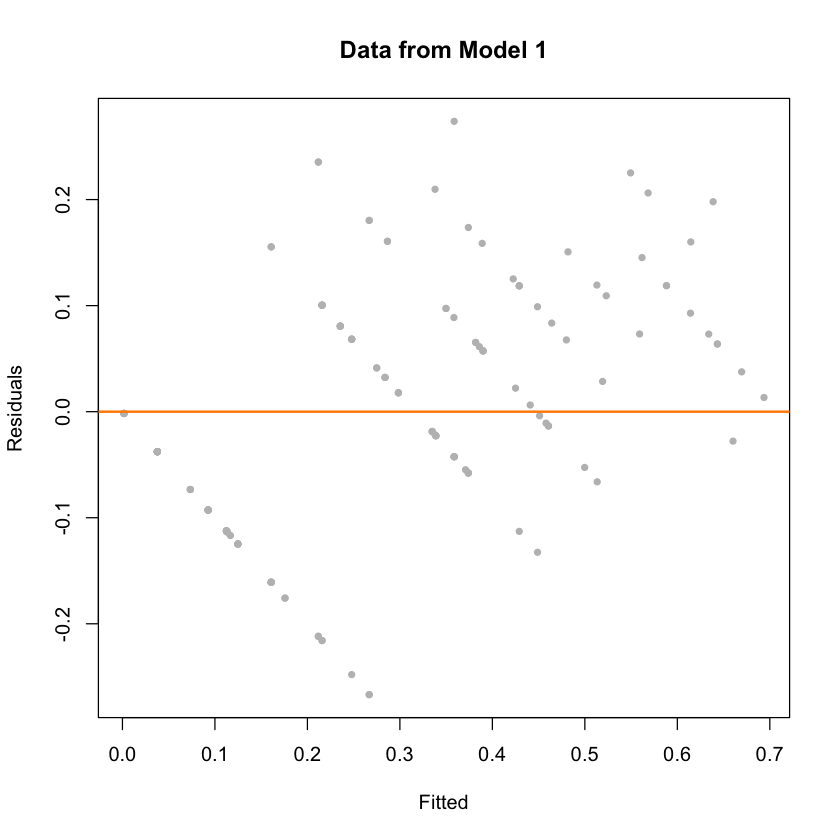

In [19]:
plot(fitted(md.affirms), resid(md.affirms), col = "grey", pch = 20,
     xlab = "Fitted", ylab = "Residuals", main = "Data from Model 1")
abline(h = 0, col = "darkorange", lwd = 2)

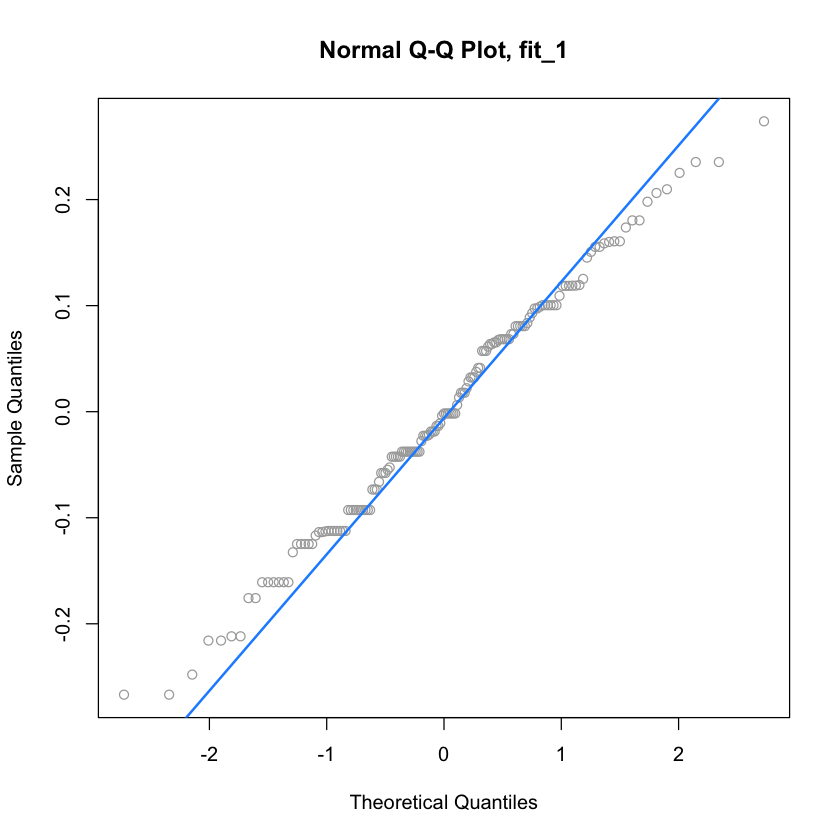

In [20]:
qqnorm(resid(md.affirms), main = "Normal Q-Q Plot, fit_1", col = "darkgrey")
qqline(resid(md.affirms), col = "dodgerblue", lwd = 2)

In [21]:
shapiro.test(resid(md.affirms))


	Shapiro-Wilk normality test

data:  resid(md.affirms)
W = 0.99066, p-value = 0.3904


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



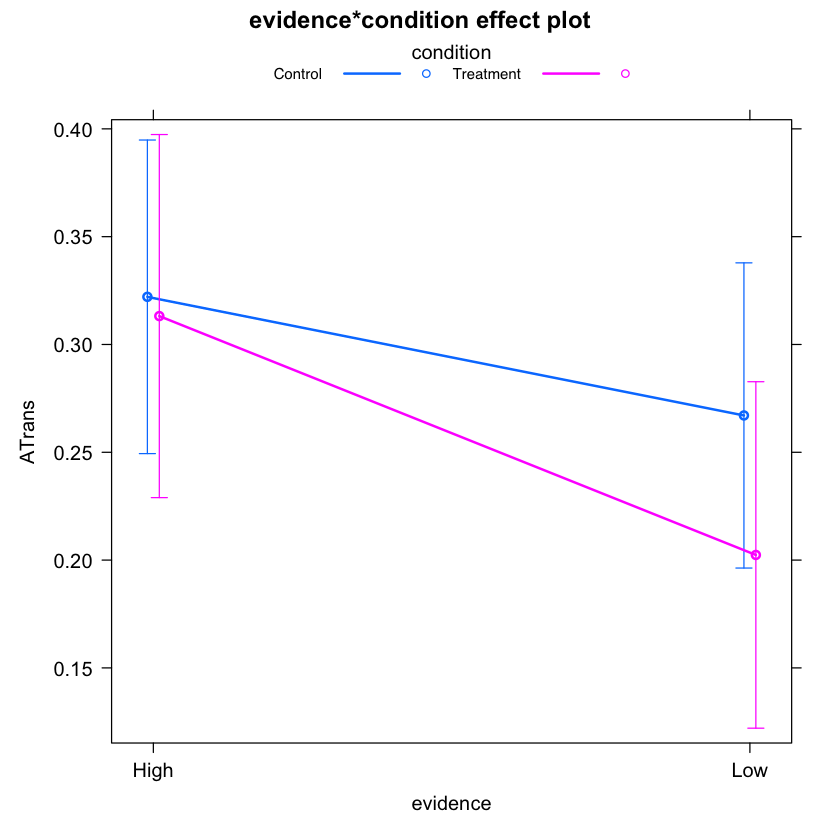

In [22]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")